In [81]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import HTML
import numpy as np

In [82]:
# TODO filter out charged + inorganic + metals
file = 'preprocessed_data.sdf'

preprocessed = PandasTools.LoadSDF(file,smilesName='SMILES',molColName='Molecule',includeFingerprints=True)


,ID,SMILES,Molecule
0,Row0,c1cc[nH]c1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
1,Row1,CCCCCCCCCCO,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
2,Row2,CC(C)O,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
3,Row3,O=[N+]([O-])c1ccc(O)c([N+](=O)[O-])c1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
4,Row4,CCCC(C)C1(CC)C(=O)NC(=O)N([Na])C1=O,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
...,...,...,...
347,Row347,Cc1nnc(N)nc1C,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
348,Row348,Cc1nc(C)c(C)o1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
349,Row349,NC(=O)c1cccc(Br)c1,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"
350,Row350,CC(C)c1cccc(C(C)C)c1N,"<img data-content=""rdkit/molecule"" src="""" alt=""Mol""/>"

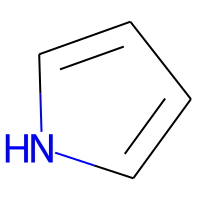
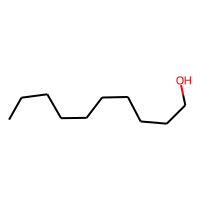
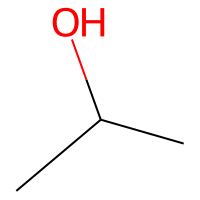
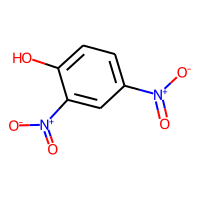
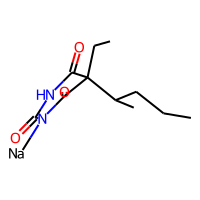
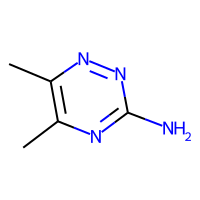
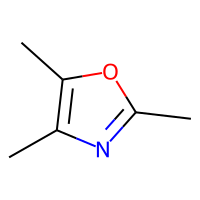
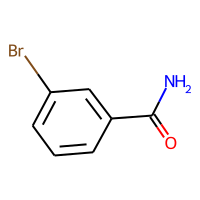
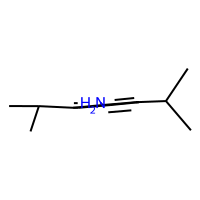
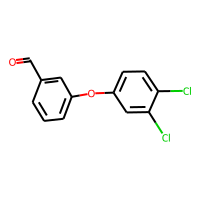

In [83]:
preprocessed

In [93]:

def is_organic(smile):
    """
    Function that tests if a smile is organic or not
    """
    organic = set([5, 6, 7, 8, 9, 15, 16, 17, 35, 53])
    
    try:
        mol = Chem.MolFromSmiles(smile)
        atom_num_list = set([atom.GetAtomicNum() for atom in mol.GetAtoms()])

        organic_mol = (atom_num_list <= organic)
    
        if organic_mol:
            return True
        else:
            return False
    except:
        return False

In [100]:
# filter out inorganic molecules
# organic =['H','C','N','Br','O','I','Cl','F','S','P']

organic = preprocessed['SMILES'].apply(filter_inorganic)

# remove inorganic molecule
preprocessed.drop(preprocessed[-organic].index)

#rdkit.Chem.PandasTools.WriteSDF(preprocessed, out="prep_data_organic.sdf", molColName="Molecule")